In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from uncertainties import ufloat

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
matplotlib.rcParams['axes.linewidth'] = 0.75 #set the value globally
matplotlib.rcParams['xtick.major.width'] = 0.75
matplotlib.rcParams['ytick.major.width'] = 0.75
matplotlib.rcParams['axes.labelsize'] = 7
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.labelsize'] = 6
matplotlib.rcParams['ytick.labelsize'] = 6
matplotlib.rcParams['legend.fontsize'] =5
matplotlib.rcParams['pdf.fonttype']=42


matplotlib.rcParams['figure.figsize'] = (3.4908516673585166, 2.327234444905678)
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rc('font', size= 7)
params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)

## $0\nu\rm{ECEC}$ resonance

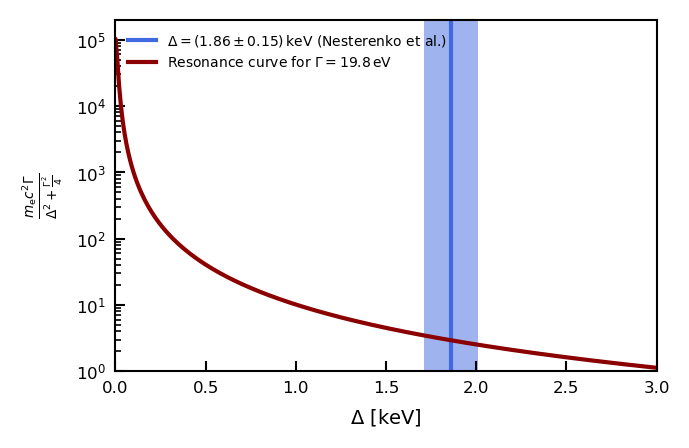

In [3]:
aDelta = 1.86 #keV
aDeltaerr = 0.15 #keV
aGamma = 0.0198 #keV
mec2 = 511 #keV

def finesse(delta, gamma):
    return np.divide(mec2*gamma,np.add(np.power(delta,2),gamma**2/4))

deltas=np.arange(-0.01,20, 0.01)

plt.axvline(aDelta, color='royalblue', label='$\\Delta = (1.86 \\pm 0.15)\,\\rm{keV}$ (Nesterenko et al.)', linestyle='-')
#plt.axvspan(aDelta-2*aDeltaerr,aDelta+2*aDeltaerr, edgecolor='none', facecolor='royalblue', alpha=0.3)
plt.axvspan(aDelta-aDeltaerr,aDelta+aDeltaerr, edgecolor='none', facecolor='royalblue', alpha=0.5)
plt.plot(deltas, finesse(deltas, aGamma), color='darkred', label='Resonance curve for $\\Gamma = 19.8\,\\rm{eV}$')
#plt.plot(deltas, finesse(deltas, 0.01), color='green', label='Resonance curve')
#plt.plot(deltas, finesse(deltas, 0.03), color='gold', label='Resonance curve')


plt.xlabel('$\\Delta$ [keV]')
plt.ylabel('$\\frac{m_{\\rm{e}}c^2\\Gamma}{\\Delta^2 + \\frac{\\Gamma^2}{4}}$')
plt.xlim(0,3)
plt.ylim(1e0,2e5)
plt.yscale('log')
plt.legend(frameon=False, loc='upper left')
plt.draw()
plt.savefig('resonance.pdf', bbox_inches='tight')

plt.show()

## Check of two-neutrino decay half-lives

Calculate half-lives independently for all sets of PSFs and accounting for the uncertainties of the half-lives => The min and max of these should give us the proper full range of half-lives.

In [4]:
#Phase-space factors (PSFs)
G={'2nuee': (1.51e-20, 1.72e-20, 2.02e-20), '2nuebp': (1.235e-21, 1.53e-21, 1.720e-21), '2nubpbp': (4.261e-26,4.770e-26,4.85e-26)}
halflife_2nuee=(0.9e22,1.4e22,1.9e22)

# Here we calculatehalflife_2nuebp=np.divide(1,(G['2nuebp']))*halflife_2nuee*G['2nuee']
halflife_2nuebp_temp=[np.divide(1,(G['2nuebp']))*hl*G['2nuee'] for hl in halflife_2nuee]
halflife_2nubpbp_temp=[4*np.divide(1,(G['2nubpbp']))*hl*G['2nuee'] for hl in halflife_2nuee]

halflife_2nuebp[0] = [arr[0] for arr in halflife_2nuebp_temp]
halflife_2nuebp[1] = [arr[1] for arr in halflife_2nuebp_temp]
halflife_2nuebp[2] = [arr[2] for arr in halflife_2nuebp_temp]

halflife_2nubpbp[0] = [arr[0] for arr in halflife_2nubpbp_temp]
halflife_2nubpbp[1] = [arr[1] for arr in halflife_2nubpbp_temp]
halflife_2nubpbp[2] = [arr[2] for arr in halflife_2nubpbp_temp]

#print(halflife_2nuebp)
print('The half-life range for 2vECb+ is:', np.min([np.min(arr) for arr in halflife_2nuebp]), np.max([np.max(arr) for arr in halflife_2nuebp]))

#print(halflife_2nubpbp)
print('The half-life range for 2vb+b+ is:', np.min([np.min(arr) for arr in halflife_2nubpbp]), np.max([np.max(arr) for arr in halflife_2nubpbp]))


NameError: name 'halflife_2nuebp' is not defined

Calculate min and max values allowed with uncertainties on PSFs and half-life

In [ ]:
#Phase-space factors (PSFs)
G={'2nuee': (1.51e-20, 2.02e-20), '2nuebp': (1.235e-21,1.720e-21), '2nubpbp': (4.261e-26,4.770e-26)}
halflife_2nuee=(0.9e22,1.9e22)

# Here we only compare PSFs that were calculated with the same method
halflife_2nuebp=np.divide(1,(G['2nuebp']))*halflife_2nuee*G['2nuee']
halflife_2nubpbp=4*np.divide(1,(G['2nubpbp']))*halflife_2nuee*G['2nuee']

print(halflife_2nuebp)
print(halflife_2nubpbp)

Mixing 0vECEC half-life uncertainties and different PSFs gives us the largest range, but I would argue it is inconsistent. Let's not do this.

In [ ]:
#Here we use the maximum range of PSFs, so we compare values from different PSF calculations (only 2nubpbp values different and array flip)
G={'2nuee': (1.51e-20, 2.02e-20), '2nuebp': (1.235e-21,1.720e-21), '2nubpbp': (4.261e-26,4.850e-26)}
halflife_2nuee=(0.9e22,1.9e22)

#Here we flip the min and max values of the PSFs because we divide by them => larger value => smaller half-life
halflife_2nuebp=np.divide(1,np.flip(G['2nuebp']))*halflife_2nuee*G['2nuee']
halflife_2nubpbp=4*np.divide(1,np.flip(G['2nubpbp']))*halflife_2nuee*G['2nuee']

print(halflife_2nuebp)
print(halflife_2nubpbp)

## Remake background plot

In [34]:
def cylinder_volume(r,z):
    return (r**2)*(np.pi)*z

vfull=cylinder_volume(60,120)
v10=cylinder_volume(60-10,120-20)
v20=cylinder_volume(60-20,120-40)
v35=cylinder_volume(60-35,120-70)

83+/-29


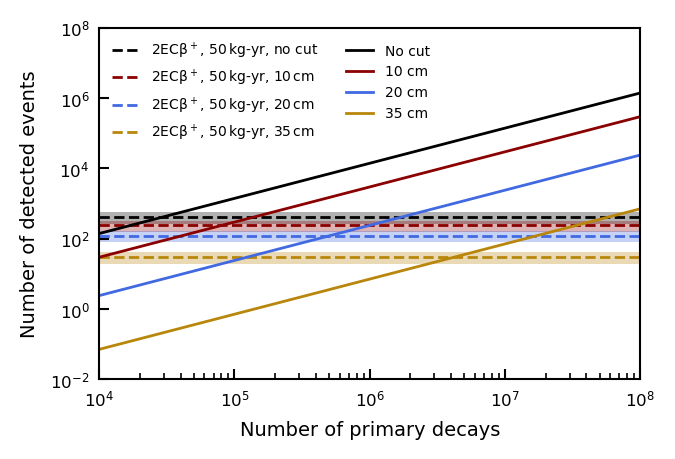

In [76]:
M = 50 #50 # target mass in kg
N_A = 6.023e23 # Avogadro´s number
A = ufloat(123.90589,0.00001) # Xe124 molar mass
time = 1
N_xe124=(M*1e3/A)*N_A

theory_2vecbp = ufloat(1.7e23,0.6e23)
eff_2vecbp = 1/100*(np.loadtxt("../analysis_DECsim/Results_Paper/fraction_1_to_50_zres_in_1steps_10xy_nothreshold_2vECB+_1_2019_11_10.txt")[9])
#eff_2vecbp = 0.47
#eff_2vecbp = 0.43
decay_rate_2vecbp = np.log(2)/theory_2vecbp*N_xe124

cut = np.arange(0,400,10)
height = (1200-2*cut)
radius = 600-cut
volume = np.pi*radius**2*height
density = 2.900e-6 # g/mm3
norm_factor = 100/7.82434511 #  
M_t = volume * density*abundance*norm_factor
#print(volume)
#print(M_t)
N_xe124_t = M_t * (N_A/A)  #abundance * M * (N_A/A) # number of Xe124 particles
decay_no_theory = decay_rate_2vecbp * time* eff_2vecbp
print(decay_no_theory/5)

numbers = [140309,29728,2405,71]
fv = [0,100,200,350]
conc = [1e4,1e5,1e6,1e7,1e8]

new_numbers_fv0 = [numbers[0]*conc[x]/1e7 for x in range(len(conc))]
new_numbers_fv100 = [numbers[1]*conc[x]/1e7 for x in range(len(conc))]
new_numbers_fv200 = [numbers[2]*conc[x]/1e7 for x in range(len(conc))]
new_numbers_fv350 = [numbers[3]*conc[x]/1e7 for x in range(len(conc))]

plt.axhline((decay_no_theory*1).nominal_value,linestyle="dashed", label = '$2\\rm{EC}\\beta^+$, 50$\,$kg-yr, no cut', color='black', linewidth=1)
plt.axhspan((decay_no_theory*1).nominal_value-(decay_no_theory*1).std_dev, (decay_no_theory*1).nominal_value+(decay_no_theory*1).std_dev, facecolor='black', edgecolor=None, alpha=0.3)

plt.axhline((decay_no_theory*v10/vfull).nominal_value, color = "darkred",linestyle="--", label = '$2\\rm{EC}\\beta^+$, 50$\,$kg-yr, 10$\,$cm', linewidth=1)
plt.axhspan((decay_no_theory*v10/vfull).nominal_value-(decay_no_theory*v10/vfull).std_dev, (decay_no_theory*v10/vfull).nominal_value+(decay_no_theory*v10/vfull).std_dev, facecolor='darkred', edgecolor=None, alpha=0.3)

plt.axhline((decay_no_theory*v20/vfull).nominal_value, color = "royalblue",linestyle="--", label = '$2\\rm{EC}\\beta^+$, 50$\,$kg-yr, 20$\,$cm', linewidth=1)
plt.axhspan((decay_no_theory*v20/vfull).nominal_value-(decay_no_theory*v20/vfull).std_dev, (decay_no_theory*v20/vfull).nominal_value+(decay_no_theory*v20/vfull).std_dev, facecolor='royalblue', edgecolor=None, alpha=0.3)

plt.axhline((decay_no_theory*v35/vfull).nominal_value, color = "darkgoldenrod",linestyle="--", label = '$2\\rm{EC}\\beta^+$, 50$\,$kg-yr, 35$\,$cm', linewidth=1)
plt.axhspan((decay_no_theory*v35/vfull).nominal_value-(decay_no_theory*v35/vfull).std_dev, (decay_no_theory*v35/vfull).nominal_value+(decay_no_theory*v35/vfull).std_dev, facecolor='darkgoldenrod', edgecolor=None, alpha=0.3)


plt.plot(conc,new_numbers_fv0, label = "No cut", color='black', linewidth=1)
plt.plot(conc,new_numbers_fv100, label = "10 cm", color='darkred', linewidth=1)
plt.plot(conc,new_numbers_fv200, label = "20 cm", color='royalblue', linewidth=1)
plt.plot(conc,new_numbers_fv350, label = "35 cm", color='darkgoldenrod', linewidth=1)



plt.yscale("log")
plt.xscale("log")
plt.ylabel("Number of detected events")
plt.xlabel("Number of primary decays")
plt.legend(frameon=False, ncol=2, loc='upper left')
plt.xlim(1e4, 1e8)
plt.ylim(1e-2, 1e8)
plt.savefig("test_new_gamma2.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()